In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
# reading the dataset
df = pd.read_csv("/content/drive/MyDrive/Customer_Segmentation/analyzed.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,2,Careful
1,2,15,81,Zanzibar City,Fresh Milk 250ml,3,Spendthrift
2,3,16,6,Mtwara,Mtindi 500ml,2,Careful
3,4,16,77,Zanzibar City,Fresh Milk 250ml,3,Spendthrift
4,5,17,40,Mtwara,Mtindi 500ml,2,Careful


In [44]:
df.shape

(200, 7)

In [45]:
df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,2,Careful
1,2,15,81,Zanzibar City,Fresh Milk 250ml,3,Spendthrift
2,3,16,6,Mtwara,Mtindi 500ml,2,Careful
3,4,16,77,Zanzibar City,Fresh Milk 250ml,3,Spendthrift
4,5,17,40,Mtwara,Mtindi 500ml,2,Careful


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 1   Annual_Revenue          200 non-null    int64 
 2   Spending_Score          200 non-null    int64 
 3   City                    200 non-null    object
 4   Most_Purchased_Product  200 non-null    object
 5   Cluster_Number          200 non-null    int64 
 6   Cluster_Nature          200 non-null    object
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [47]:
df.describe()

,Merchant Id,Annual_Revenue,Spending_Score,Cluster_Number
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000,1.515000
std,57.879185,26.264721,25.823522,1.569103
min,1.000000,15.000000,1.000000,0.000000
25%,50.750000,41.500000,34.750000,0.000000
50%,100.500000,61.500000,50.000000,1.000000
75%,150.250000,78.000000,73.000000,3.000000
max,200.000000,137.000000,99.000000,4.000000


In [48]:
df['Most_Purchased_Product'].value_counts()

Most_Purchased_Product
Mtindi 250ml        82
Fresh Milk 1ltr     76
Mtindi 500ml        21
Fresh Milk 250ml    21
Name: count, dtype: int64

In [49]:
df['City'].value_counts()

City
Dar es Salaam    82
Moshi            76
Mtwara           21
Zanzibar City    21
Name: count, dtype: int64

In [50]:
# checking null values
df.isnull().sum()

Merchant Id               0
Annual_Revenue            0
Spending_Score            0
City                      0
Most_Purchased_Product    0
Cluster_Number            0
Cluster_Nature            0
dtype: int64

# EDA

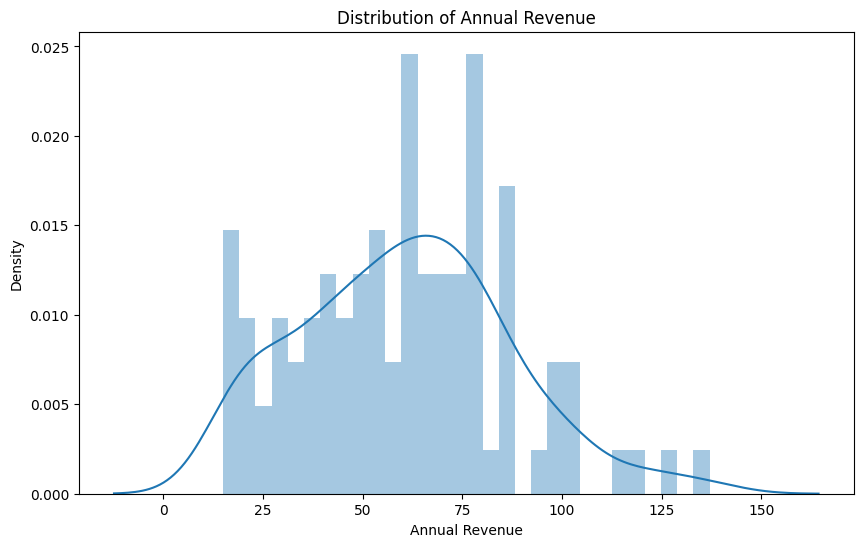

In [51]:
# Distribution plot of annual revenue
plt.figure(figsize=(10,6))
sns.distplot(df['Annual_Revenue'], kde=True, bins=30)
plt.xlabel('Annual Revenue')
plt.title('Distribution of Annual Revenue')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

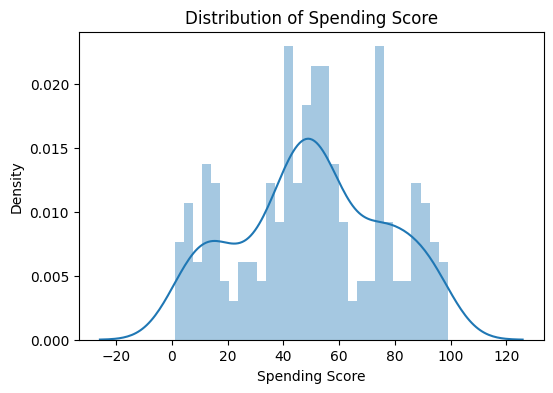

In [52]:
# distribution plot of spending score
plt.figure(figsize=(6,4))
sns.distplot(df['Spending_Score'], kde=True, bins=30)
plt.xlabel('Spending Score')
plt.title('Distribution of Spending Score')
plt.show

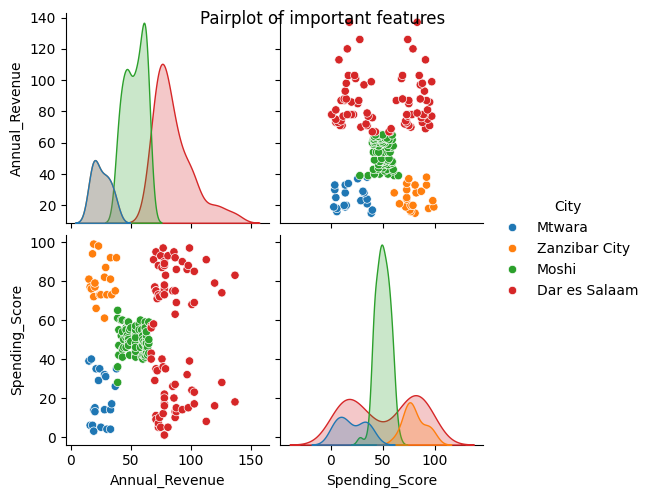

In [56]:
# plotting pairplot
sns.pairplot(df[['Annual_Revenue', 'Spending_Score', 'City']], hue='City')
plt.suptitle('Pairplot of important features')
plt.show()

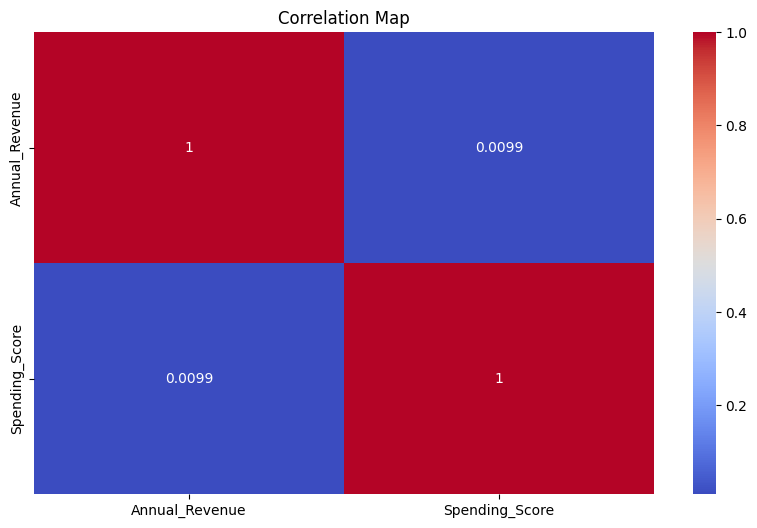

In [57]:
# pltting correlation map for cheking if there's relation between the variables
plt.figure(figsize=(10,6))
sns.heatmap(df[['Annual_Revenue', 'Spending_Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

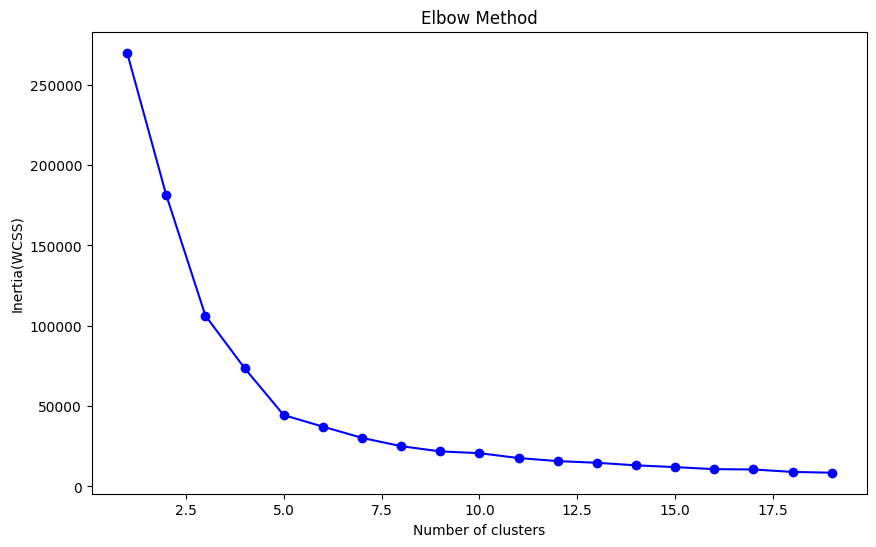

In [58]:
#creating values for the elbow
from sklearn.cluster import KMeans
plt.figure(figsize=(10,6))
x = df.loc[ : , ['Annual_Revenue', 'Spending_Score']]
inertia = []
k = range(1,20)
for i in k:
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(x)
  inertia.append(kmeans.inertia_)

plt.plot(k, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia(WCSS)')
plt.title('Elbow Method')
plt.show()

In [59]:
#fitting K-means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [60]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [61]:
len(y_kmeans)

200

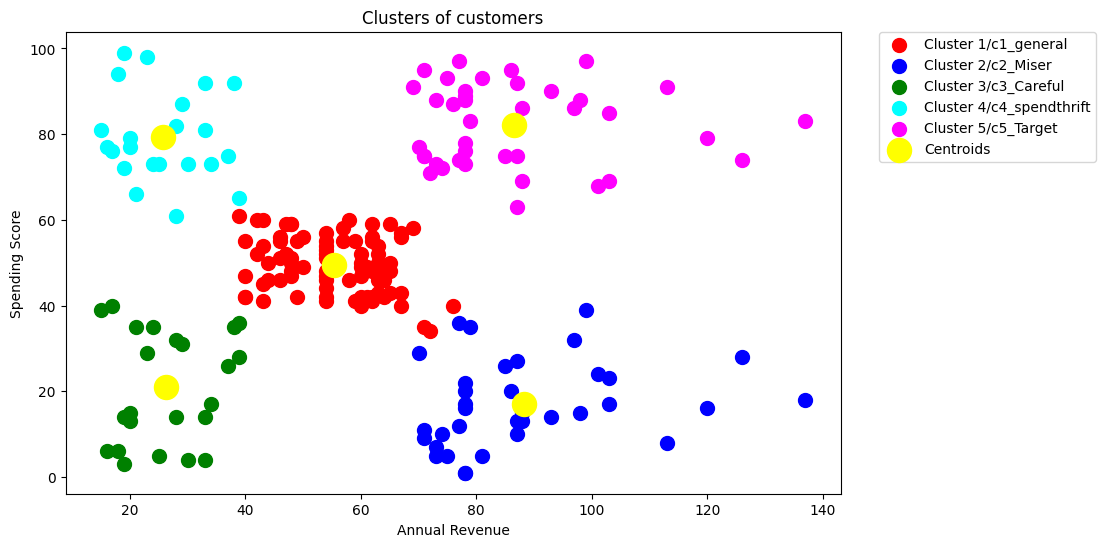

In [62]:
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0]['Annual_Revenue'], x[y_kmeans == 0]['Spending_Score'], s = 100, c = 'red', label = 'Cluster 1/c1_general')
plt.scatter(x[y_kmeans == 1]['Annual_Revenue'], x[y_kmeans == 1]['Spending_Score'], s = 100, c = 'blue', label = 'Cluster 2/c2_Miser')
plt.scatter(x[y_kmeans == 2]['Annual_Revenue'], x[y_kmeans == 2]['Spending_Score'], s = 100, c = 'green', label = 'Cluster 3/c3_Careful')
plt.scatter(x[y_kmeans == 3]['Annual_Revenue'], x[y_kmeans == 3]['Spending_Score'], s = 100, c = 'cyan', label = 'Cluster 4/c4_spendthrift')
plt.scatter(x[y_kmeans == 4]['Annual_Revenue'], x[y_kmeans == 4]['Spending_Score'], s = 100, c = 'magenta', label = 'Cluster 5/c5_Target')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Revenue')
plt.ylabel('Spending Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [63]:
df.loc[:, 'Cluster_Number'] = y_kmeans

In [64]:
Cluster_Nature = []

for row in df['Cluster_Number']:
  if row == 0:
    Cluster_Nature.append('General')
  elif row == 1:
    Cluster_Nature.append('Miser')
  elif row == 2:
    Cluster_Nature.append('Careful')
  elif row == 3:
    Cluster_Nature.append('Spendthrift')
  elif row == 4:
    Cluster_Nature.append('Target')
  else:
    Cluster_Nature.append('Outlier')
df['Cluster_Nature'] = Cluster_Nature



In [65]:
df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,2,Careful
1,2,15,81,Zanzibar City,Fresh Milk 250ml,3,Spendthrift
2,3,16,6,Mtwara,Mtindi 500ml,2,Careful
3,4,16,77,Zanzibar City,Fresh Milk 250ml,3,Spendthrift
4,5,17,40,Mtwara,Mtindi 500ml,2,Careful


In [66]:
df['Cluster_Nature'].value_counts()

Cluster_Nature
General        81
Target         39
Miser          35
Careful        23
Spendthrift    22
Name: count, dtype: int64

In [67]:
df['Cluster_Nature'].unique()

array(['Careful', 'Spendthrift', 'General', 'Target', 'Miser'],
      dtype=object)

In [68]:
target_df = df.loc[df['Cluster_Nature'] == 'Target']

In [69]:
target_df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Cluster_Number,Cluster_Nature
123,124,69,91,Dar es Salaam,Mtindi 250ml,4,Target
125,126,70,77,Dar es Salaam,Mtindi 250ml,4,Target
127,128,71,95,Dar es Salaam,Mtindi 250ml,4,Target
129,130,71,75,Dar es Salaam,Mtindi 250ml,4,Target
131,132,71,75,Dar es Salaam,Mtindi 250ml,4,Target


<Axes: >

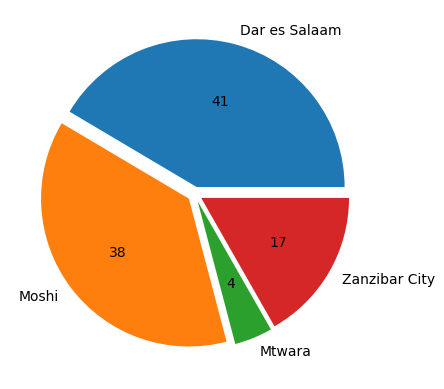

In [70]:
explode = (0.05, 0.05, 0.05, 0.05)

df.groupby(['City']).sum().plot(kind = 'pie', y="Spending_Score", autopct = '%1.0f', explode = explode, legend = False, ylabel = '')

Dar es Salaam is the city where the company spended more over distributor products. Furthermore, the behaviour of the customer is 41% in Dar es Salaam following with 38% in Moshi.

<Axes: >

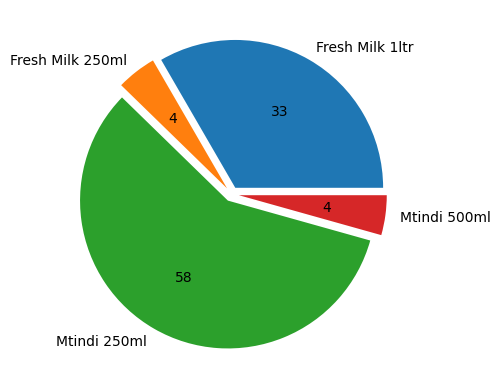

In [71]:
explode = (0.05, 0.05, 0.05, 0.05)

df.groupby(['Most_Purchased_Product']).sum().plot(kind = 'pie', y="Annual_Revenue", autopct = '%1.0f', explode = explode, legend = False, ylabel = '')

Mtindi 250ml is the product on which we spend the highest amount on distributors following with fresh milk 1ltr.

Cluster_Nature  Careful  General  Miser  Spendthrift  Target
City                                                        
Dar es Salaam         0        8     35            0      39
Moshi                 2       73      0            1       0
Mtwara               21        0      0            0       0
Zanzibar City         0        0      0           21       0


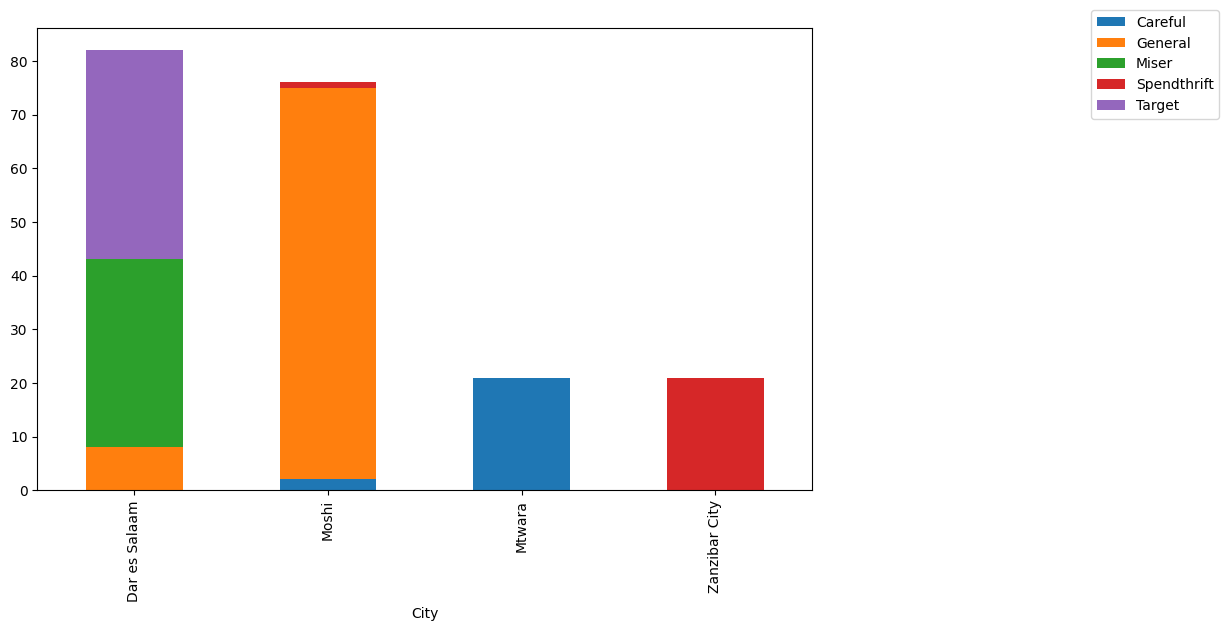

In [72]:
#Cross Tubulation between city and cluster nature

crossdf = pd.crosstab(index = df['City'], columns= df['Cluster_Nature'])
print(crossdf)

crossdf.plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.legend(bbox_to_anchor=(1.36, 1.04), loc='upper left', borderaxespad=0)
plt.show()

City                    Dar es Salaam  Moshi  Mtwara  Zanzibar City
Most_Purchased_Product                                             
Fresh Milk 1ltr                     0     76       0              0
Fresh Milk 250ml                    0      0       0             21
Mtindi 250ml                       82      0       0              0
Mtindi 500ml                        0      0      21              0


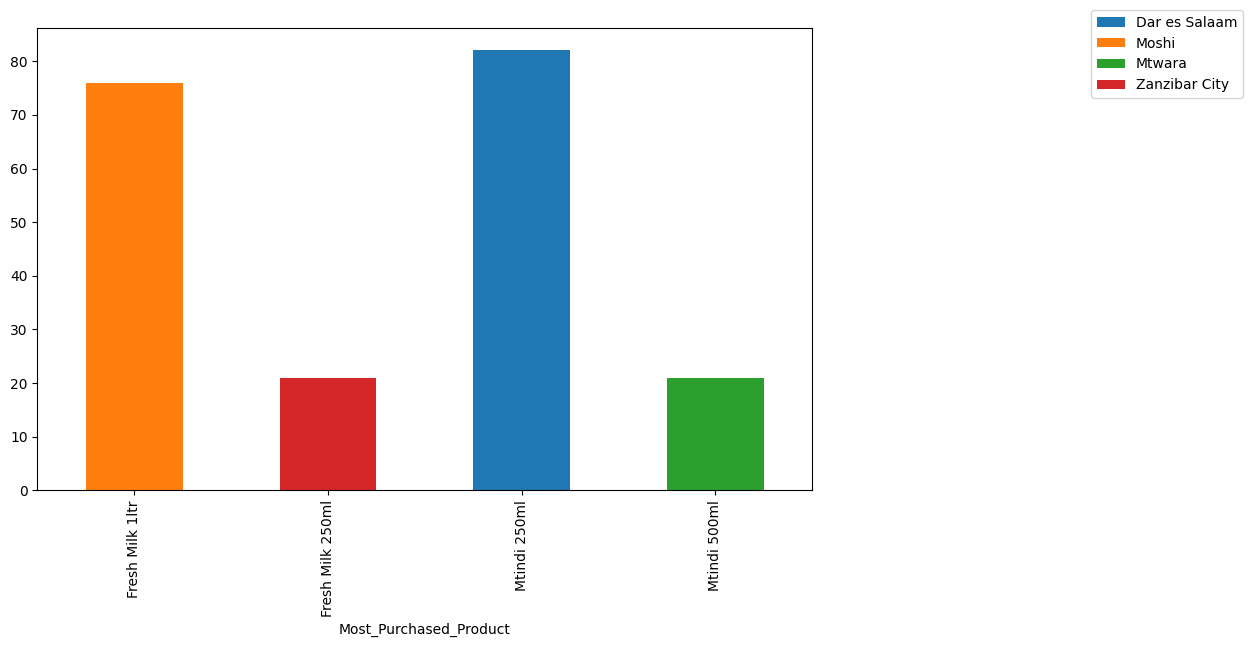

In [73]:
crossdf = pd.crosstab(index = df['Most_Purchased_Product'], columns= df['City'])
print(crossdf)

crossdf.plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.legend(bbox_to_anchor=(1.36, 1.04), loc='upper left', borderaxespad=0)
plt.show()

                              Annual_Revenue
City          Cluster_Nature                
Dar es Salaam General              69.500000
              Miser                88.200000
              Target               86.538462
Moshi         Careful              39.000000
              General              53.739726
              Spendthrift          39.000000
Mtwara        Careful              25.095238
Zanzibar City Spendthrift          25.095238


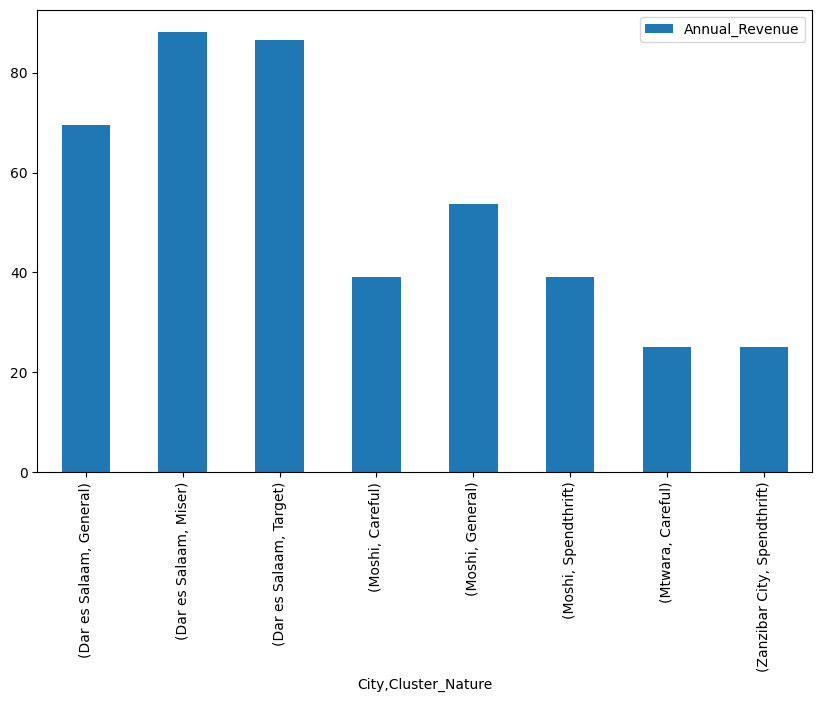

In [75]:
table = pd.pivot_table(df,index = ['City', 'Cluster_Nature'], aggfunc={'Annual_Revenue':np.mean})
print(table)
table.plot(kind = 'bar', figsize = (10,6))
plt.show()

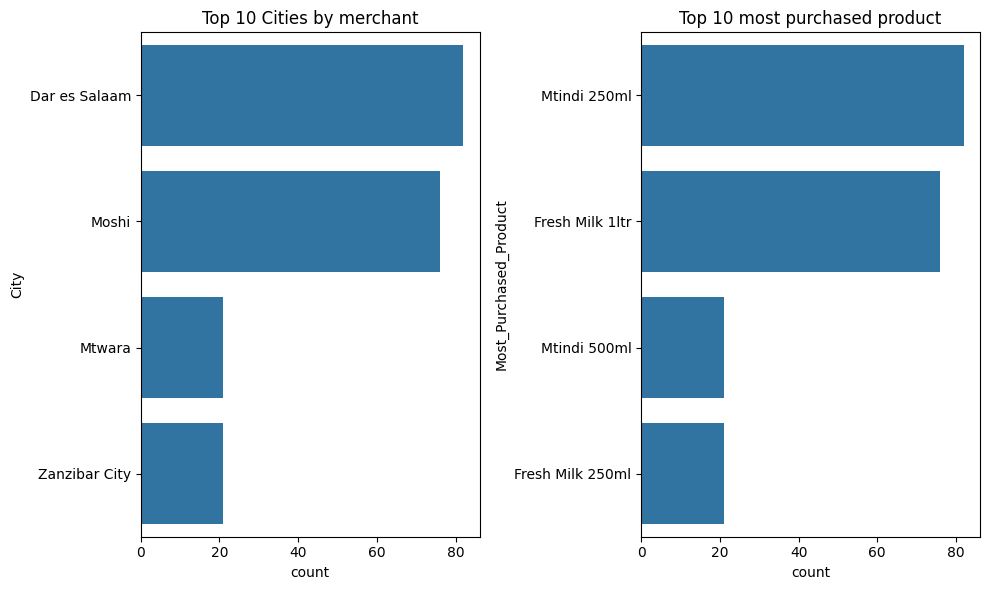

In [76]:
#count plots for categorical variables
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(y='City', data=df, order = df['City'].value_counts().index[:10])
plt.title('Top 10 Cities by merchant')
plt.subplot(1,2,2)
sns.countplot(y='Most_Purchased_Product', data=df, order = df['Most_Purchased_Product'].value_counts().index[:10])
plt.title('Top 10 most purchased product')
plt.tight_layout()
plt.show()

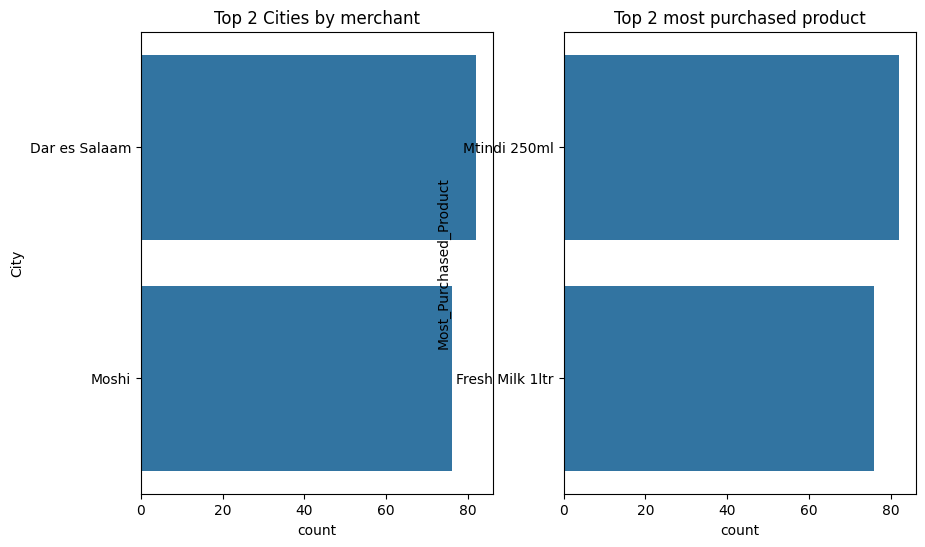

In [77]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(y='City', data=df, order = df['City'].value_counts().index[:2])
plt.title('Top 2 Cities by merchant')

plt.subplot(1,2,2)
sns.countplot(y='Most_Purchased_Product', data=df, order = df['Most_Purchased_Product'].value_counts().index[:2])
plt.title('Top 2 most purchased product')
plt.show()

# Problem 2
Given the payment history that the merchant has and the cities that the merchant operates in, create a credit scoring algorithm that will help the distributor.
#Solution

In [78]:
print(df.head())
print(df.info())

df.dropna(inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['Most_Purchased_Product'] = le.fit_transform(df['Most_Purchased_Product'])

   Merchant Id  Annual_Revenue  Spending_Score           City  \
0            1              15              39         Mtwara   
1            2              15              81  Zanzibar City   
2            3              16               6         Mtwara   
3            4              16              77  Zanzibar City   
4            5              17              40         Mtwara   

  Most_Purchased_Product  Cluster_Number Cluster_Nature  
0           Mtindi 500ml               2        Careful  
1       Fresh Milk 250ml               3    Spendthrift  
2           Mtindi 500ml               2        Careful  
3       Fresh Milk 250ml               3    Spendthrift  
4           Mtindi 500ml               2        Careful  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 

#Model

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

x= df[['Annual_Revenue', 'Spending_Score', 'City', 'Most_Purchased_Product', 'Cluster_Number']]
y= df['Cluster_Nature']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier( random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

     Careful       1.00      1.00      1.00         3
     General       1.00      1.00      1.00        18
       Miser       1.00      1.00      1.00        11
 Spendthrift       1.00      1.00      1.00         3
      Target       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#Problem 3
Figure out which are the most creditworthy merchants and which ones are not.
#Solution

In [86]:
import os
print(os.getcwd())
df['Predicted_Cluster_Nature'] = clf.predict(x)

most_creditworthy_merchants = df[df['Predicted_Cluster_Nature'].isin(['General', 'Careful'])]
not_creditworthy_merchants = df[df['Predicted_Cluster_Nature'].isin([ 'Miser', 'Spendthrift'])]

#saving the file to csv
df.to_csv('finalised_data.csv', index=False)
print(df.head())


print('most_creditworthy_merchants:')
print(most_creditworthy_merchants.head())

print('not_creditworthy_merchants:')
print(not_creditworthy_merchants.head())

print("File saved")

print("File saved in: ", os.path.abspath('finalised_data.csv'))

/content
   Merchant Id  Annual_Revenue  Spending_Score  City  Most_Purchased_Product  \
0            1              15              39     2                       3   
1            2              15              81     3                       1   
2            3              16               6     2                       3   
3            4              16              77     3                       1   
4            5              17              40     2                       3   

   Cluster_Number Cluster_Nature Predicted_Cluster_Nature  
0               2        Careful                  Careful  
1               3    Spendthrift              Spendthrift  
2               2        Careful                  Careful  
3               3    Spendthrift              Spendthrift  
4               2        Careful                  Careful  
most_creditworthy_merchants:
   Merchant Id  Annual_Revenue  Spending_Score  City  Most_Purchased_Product  \
0            1              15           

In [87]:
df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Cluster_Number,Cluster_Nature,Predicted_Cluster_Nature
0,1,15,39,2,3,2,Careful,Careful
1,2,15,81,3,1,3,Spendthrift,Spendthrift
2,3,16,6,2,3,2,Careful,Careful
3,4,16,77,3,1,3,Spendthrift,Spendthrift
4,5,17,40,2,3,2,Careful,Careful


#Problem 4
Create a parameter based on their nature from the cluster group they belong to, such as Careful, Spendthrift, General, Target and Miser
#Solution


In [88]:
cluster_summary = df.groupby('Cluster_Number')['Annual_Revenue'].mean()
print(cluster_summary)

Cluster_Number
0    55.296296
1    88.200000
2    26.304348
3    25.727273
4    86.538462
Name: Annual_Revenue, dtype: float64


By implementing these steps, Cow and Buffalo Milk company can significantly boost sales and streamline advertising expenditures. The credit scoring algorithm allows for the identification of merchants with strong creditworthiness, ensuring more reliable business relationships. Additionally, clustering analysis offers valuable insights into distinct customer segments, enabling the company to tailor marketing strategies effectively for each group. This dual approach ensures both increased revenue and more efficient allocation of marketing resources.

#Problem 5
How you would you advise Cow and Buffalo Milk company on which merchants to target.
#Solution
Focusing strategy: Concentrate on the 'Careful' and 'General' categories (Cluster_Nature). Merchants in these groups tend to have stable purchasing patterns and higher creditworthiness, making them more reliable and consistent. These attributes suggest they are likely to yield better returns on advertising investments.

But, Be cautious with merchants labeled as 'Spendthrift' and 'Miser'. These groups often show unpredictable purchasing behaviors, which can lead to uncertain results and potentially lower returns on advertising investments.

#Problem 6
Download the final analysed data into CSV file with the below sample format having to which cluster they belong to and their nature columns for all the merchants in the data.
#Solution
Already Done
